In [307]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score

plt.style.use('ggplot')

## Importing Data Sets

In [308]:
# Training data sets
train_beneficiarydata = pd.read_csv("./healthCareData/train_beneficiarydata.csv")
train_inpatientdata = pd.read_csv("./healthCareData/train_inpatientdata.csv")
train_outpatientdata = pd.read_csv("./healthCareData/train_outpatientdata.csv")
train_potentialfraud = pd.read_csv("./healthCareData/train_potentialfraud.csv")

#Testing data sets
test_beneficiarydata = pd.read_csv("./healthCareData/test_beneficiarydata.csv")
test_inpatientdata = pd.read_csv("./healthCareData/test_inpatientdata.csv")
test_outpatientdata = pd.read_csv("./healthCareData/test_outpatientdata.csv")
test_potentialfraud = pd.read_csv("./healthCareData/test_potentialfraud.csv")


In [310]:
pd.options.display.max_columns = None


## Warmup Question 1:

- How many medical doctors are there in the train outpatient dataset?
- How many medical doctors are there in the train inpatient dataset? Do they match with those from the outpatient record?
- Do those inpatient patients show worse health conditions (in terms of chronic diseases) than typical outpatient patients, or do those who have more visits to the providers have worse health conditions? Provide an analysis on these issues.
- How many distinct patients (BeneIDs) are there in the in/out-patient datasets?
- Do doctors serve for different providers? Study the distribution of hospital counts/doctor? Is it possible to characterize those doctors who move around among different providers?
- Do patients go to different hospitals? Study the distribution of hospital counts/patient? It is possible to characterize those patients who receive services from a lot of different hospitals?
- Do the same providers provide both inpatient and outpatient services? Summarize your finding.
- Do Some of the same patients receive both inpatient and outpatient services? Summarize your finding.

In [544]:
#Create columns for inpatient and outpatient data.
train_inpatientdata['patientType'] = np.repeat('inpatient', len(train_inpatientdata))
train_outpatientdata['patientType'] = np.repeat('outpatient', len(train_outpatientdata))

train_inpatientdata['patientType'] = np.repeat('inpatient', len(train_inpatientdata))
train_outpatientdata['patientType'] = np.repeat('outpatient', len(train_outpatientdata))

train_beneficiarydata

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,1,2,2,2,2,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,1,2,2,2,2,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,2,1,1,1,2,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,1,1,2,2,2,2,2,1,2,2,2,0,0,2650,10


In [312]:
#Combining the inpatient and outpatient data
patient = pd.concat([train_inpatientdata, train_outpatientdata], axis=0)
patient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,patientType
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inpatient
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,inpatient
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inpatient
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,inpatient
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,inpatient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,NaN,0.0,NaN,NaN,2163,V4575,53190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,NaN,0.0,NaN,NaN,07041,5781,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,NaN,0.0,NaN,NaN,V570,78079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient


In [313]:
#Merge the patient data frame and 
full_data =pd.merge(patient, train_beneficiarydata, on='BeneID', how='left')

In [314]:
full_data= pd.merge(full_data, train_potentialfraud, on='Provider', how='left')

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,patientType,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inpatient,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,inpatient,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inpatient,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,inpatient,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,inpatient,1938-04-01,NaN,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,NaN,0.0,NaN,NaN,2163,V4575,53190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient,1952-04-01,NaN,2,1,0,21,20,12,12,1,1,2,2,2,1,1,2,2,1,2,0,0,5470,1870,No
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,NaN,0.0,NaN,NaN,07041,5781,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient,1952-04-01,NaN,2,1,0,21,20,12,12,1,1,2,2,2,1,1,2,2,1,2,0,0,5470,1870,No
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,NaN,0.0,NaN,NaN,V570,78079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient,1952-04-01,NaN,2,1,0,21,20,12,12,1,1,2,2,2,1,1,2,2,1,2,0,0,5470,1870,No
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,outpatient,1952-04-01,NaN,2,1,0,21,20,12,12,1,1,2,2,2,1,1,2,2,1,2,0,0,5470,1870,No


## Providers and Doctors

### How many medical doctors are there in the train outpatient dataset? How many medical doctors are there in the train inpatient dataset? Do they match with those from the outpatient record?

- There are 11,605 doctors in the inpatient data and 74,110 doctors in the outpatient data.

In [12]:
print(full_data.loc[full_data.patientType=='inpatient'].AttendingPhysician.unique().shape[0])
print(full_data.loc[full_data.patientType=='outpatient'].AttendingPhysician.unique().shape[0])


11605
74110


### Do doctors serve for different providers? Study the distribution of hospital counts/doctor? Is it possible to characterize those doctors who move around among different providers?

- Most doctors have a connection of 1 clinic. 

In [13]:
physician= full_data.groupby(['AttendingPhysician','Provider'])['Provider'].count().\
reset_index(name='NumProvider').groupby(['AttendingPhysician'])['NumProvider'].count().reset_index()

print(physician.NumProvider.value_counts())


1    76844
2     4741
3      382
4       65
5       19
6        9
9        1
8        1
7        1
Name: NumProvider, dtype: int64


In [14]:
phy3 = physician.loc[physician.NumProvider==9]

phy4 = pd.concat([phy3, full_data[['AttendingPhysician', 'Provider']]], axis=1)
phy5 = pd.merge(phy4, train_potentialfraud, on='Provider', how='left')


In [12]:
phy4

,AttendingPhysician,NumProvider,AttendingPhysician,Provider
0,NaN,NaN,PHY390922,PRV55912
1,NaN,NaN,PHY318495,PRV55907
2,NaN,NaN,PHY372395,PRV56046
3,NaN,NaN,PHY369659,PRV52405
4,NaN,NaN,PHY379376,PRV56614
...,...,...,...,...
558206,NaN,NaN,PHY364188,PRV53699
558207,NaN,NaN,PHY423019,PRV53702
558208,NaN,NaN,PHY361063,PRV53676
558209,NaN,NaN,PHY403198,PRV53689


Text(0, 0.5, 'number of doctors per provider')

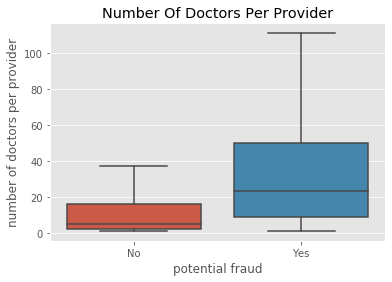

In [15]:
doctors = full_data.groupby(['Provider', 'AttendingPhysician'])['AttendingPhysician'].count().reset_index(name='NumOfDoctors').\
groupby('Provider')['NumOfDoctors'].count().reset_index()

doctors2 = pd.merge(doctors, train_potentialfraud, on='Provider', how='left')


sns.boxplot(x='PotentialFraud', y='NumOfDoctors', data=doctors2, showfliers=False)
plt.title('Number Of Doctors Per Provider')
plt.xlabel('potential fraud')
plt.ylabel('number of doctors per provider')

## Feature Engineering
- add number of doctors

In [16]:
doctors= full_data.groupby(['Provider', 'AttendingPhysician'])['AttendingPhysician'].count().\
reset_index(name='NumOfDoctors').groupby('Provider')['NumOfDoctors'].count().reset_index()

trainProvider = pd.merge(train_potentialfraud, doctors, on='Provider')
trainProvider.sample(2)

,Provider,PotentialFraud,NumOfDoctors
2847,PRV54549,No,1
234,PRV51299,No,12


## Providers and Patients

### How many distinct patients (BeneIDs) are there in the in/out-patient datasets?
- There are 31,289 inpatient patients and 133,980 outpatient patients

In [17]:
print(full_data.loc[full_data.patientType=='inpatient'].BeneID.unique().shape[0])
print(full_data.loc[full_data.patientType=='outpatient'].BeneID.unique().shape[0])


31289
133980


### Do patients go to different hospitals? Study the distribution of hospital counts/patient? It is possible to characterize those patients who receive services from a lot of different hospitals?¶
We can characterize these patients by the number of providers they have. We can generate a new feature providers per patient.

In [18]:
patient= full_data.groupby(['BeneID', 'Provider', 'PotentialFraud'])['BeneID'].count().reset_index(name='NumProvider').\
groupby(['BeneID', 'PotentialFraud'])['NumProvider'].count().reset_index()


Text(0.5, 1.0, 'Proportion of Providers Per Patient')

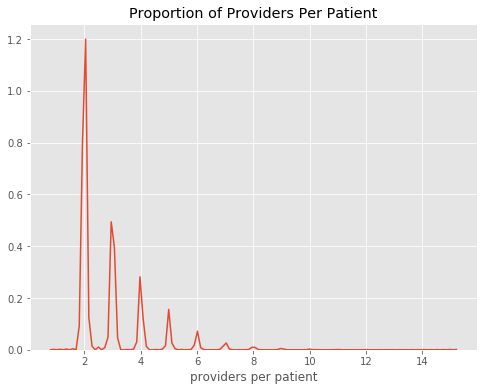

In [19]:


plt.subplots(figsize=(8,6))
sns.distplot(patient['NumProvider'], hist=False)
plt.xlabel('providers per patient')
plt.title('Proportion of Providers Per Patient')

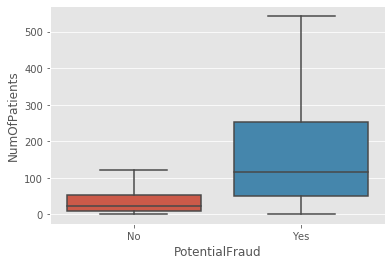

In [20]:
patients = full_data.groupby(['Provider', 'BeneID'])['BeneID'].count().reset_index(name='NumOfPatients').\
groupby('Provider')['NumOfPatients'].count().reset_index()

provider_patient= pd.merge(patients, train_potentialfraud, on='Provider', how='left')

sns.boxplot(x='PotentialFraud', y='NumOfPatients', data=provider_patient, showfliers=False)


## Feature Engineering
- add number of patients

In [21]:
patient= full_data.groupby(['Provider','BeneID'])['BeneID'].count().reset_index(name='NumOfPatients').\
groupby('Provider')['NumOfPatients'].count().reset_index()

trainProvider2 = pd.merge(trainProvider, patient, on='Provider')
trainProvider2.sample(2)

,Provider,PotentialFraud,NumOfDoctors,NumOfPatients
192,PRV51247,No,13,26
4653,PRV56826,No,15,24


## How  does providers' number of doctors and patients help detect fraud?

Text(0, 0.5, 'number of patients')

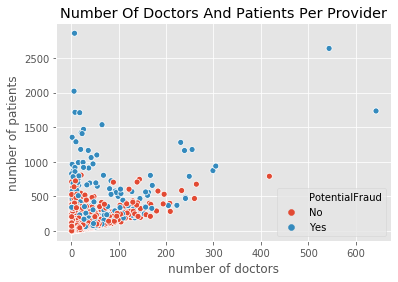

In [22]:
sns.scatterplot(x='NumOfDoctors', y='NumOfPatients', data=trainProvider2, hue='PotentialFraud')
plt.title('Number Of Doctors And Patients Per Provider')
plt.xlabel('number of doctors')
plt.ylabel('number of patients')

## Do those inpatient patients show worse health conditions (in terms of chronic diseases) than typical outpatient patients

Text(0.5, 0, 'type of patient')

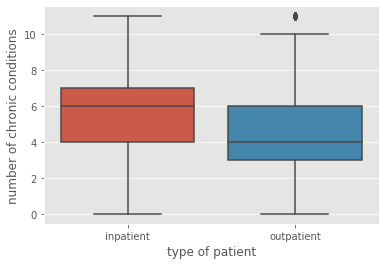

In [23]:
patientChronic = full_data.filter(regex='Chronic').replace(to_replace=2, value=0).sum(axis=1).\
reset_index(name='NumChronicCond')

chronicCond = pd.concat([patientChronic,full_data[['patientType', 'BeneID', 'ClaimID', 'PotentialFraud']]], axis =1)

sns.boxplot(x='patientType', y='NumChronicCond',  data=chronicCond)
plt.ylabel('number of chronic conditions')
plt.xlabel('type of patient')
                       

##  Do those who have more visits to the providers have worse health conditions? Provide an analysis on these issues.




In [24]:
patientChronic = full_data.filter(regex='Chronic').replace(to_replace=2, value=0).sum(axis=1).\
reset_index(name='NumChronicCond')

chronic = pd.concat([patientChronic, full_data[['Provider', 'ClaimID']]], axis=1)

a= chronic.groupby(['Provider', 'NumChronicCond'])['ClaimID'].count().reset_index(name='TotClaims').\
groupby('Provider')[['NumChronicCond', 'TotClaims']].mean().reset_index()

b = pd.merge(a, train_potentialfraud, on='Provider', how='left')


b_no = b.loc[b.PotentialFraud=='No']
b_yes= b.loc[b.PotentialFraud=='Yes']




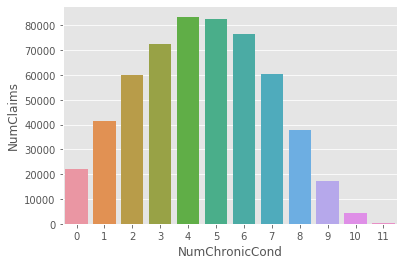

In [25]:

chronic2 = chronic.groupby(['NumChronicCond'])['ClaimID'].count().reset_index(name='NumClaims')
sns.barplot(x='NumChronicCond', y='NumClaims', data=chronic2)

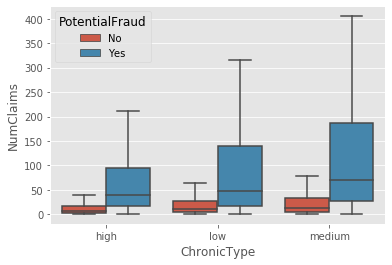

In [26]:
def getChronicGroup(x):
    if x <4:
        return('low')
    elif (x >= 4)& (x< 7):
        return('medium')
    else:
        return('high')


chronic['ChronicType'] = chronic['NumChronicCond'].apply(getChronicGroup )

x= chronic.groupby(['Provider', 'ChronicType'])['ClaimID'].count().reset_index(name='NumClaims')

y = pd.merge(x, train_potentialfraud, on='Provider', how='left')


sns.boxplot(x='ChronicType', y='NumClaims',data = y, hue='PotentialFraud', showfliers=False)

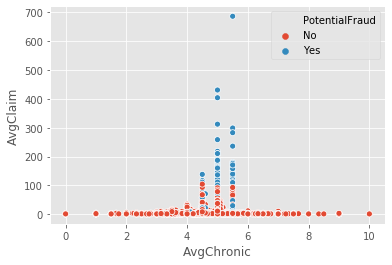

In [27]:
patientChronic = full_data.filter(regex='Chronic').replace(to_replace=2, value=0).sum(axis=1).\
reset_index(name='NumChronicCond')


chronic = pd.concat([patientChronic, full_data[['Provider', 'ClaimID']]], axis=1)
chronic

avgChronic = chronic.groupby(['Provider', 'NumChronicCond'])['ClaimID'].count().reset_index(name='NumClaims').\
groupby('Provider').agg({'NumChronicCond':'mean', 'NumClaims':'mean'}).reset_index().\
rename(columns={'NumChronicCond':'AvgChronic', 'NumClaims':'AvgClaim'})


avgChronic2= pd.merge(avgChronic, train_potentialfraud, on='Provider', how='left')

sns.scatterplot(x='AvgChronic', y='AvgClaim', data=avgChronic2, hue='PotentialFraud')

## Do the same providers provide both inpatient and outpatient services? Summarize your finding.

- There are 1694 providers that offer both services
- There are 398 providers that offer inpatient services only
- There are 3318 providers thar offer outpatient services only

In [28]:
a = full_data.groupby(['Provider', 'patientType'])['BeneID'].count().reset_index(name='count').\
drop('count', axis=1)

a_list= list(zip(a.Provider, a.patientType))

providerDict= {}

for ele in a_list:
    if ele[0] not in providerDict:
        providerDict[ele[0]]= ele[1]    
    else:
        providerDict[ele[0]] = 'both'
        

providerService = pd.DataFrame(providerDict.keys(), providerDict.values()).reset_index().\
rename(columns={'index':'ServiceType', 0:'Provider'})


In [29]:
serviceFraud = pd.merge(train_potentialfraud, providerService, on='Provider')


serviceFraud.groupby('ServiceType')['Provider'].count()

ServiceType
both          1694
inpatient      398
outpatient    3318
Name: Provider, dtype: int64

## Providers that offer only outpatient service have a low chance of commiting fraud. While providers that offer both services have a greater chance of commiting healthcare fraud.

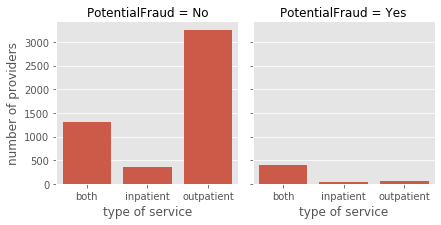

In [30]:
serviceFraud = pd.merge(train_potentialfraud, providerService, on='Provider')

service = serviceFraud.groupby(['ServiceType', 'PotentialFraud'])['Provider'].count().reset_index(name='count')


g = sns.FacetGrid(service, col="PotentialFraud")
g.map_dataframe(sns.barplot, x="ServiceType", y="count")
g.set_axis_labels("type of service", "number of providers")


## Feature Engineering
- add type of service
- add number of claims


In [31]:
trainProvider3 = pd.merge(trainProvider2, providerService, on='Provider')
trainProvider3.sample(2)

,Provider,PotentialFraud,NumOfDoctors,NumOfPatients,ServiceType
938,PRV52173,Yes,2,108,inpatient
1368,PRV52699,No,8,11,both


In [32]:
claims= full_data.groupby(['Provider', 'ClaimID'])['ClaimID'].count().\
reset_index(name='NumOfClms').groupby('Provider')['NumOfClms'].count().reset_index()

trainProvider4 = pd.merge(trainProvider3, claims, on='Provider')
trainProvider4.sample(10)




,Provider,PotentialFraud,NumOfDoctors,NumOfPatients,ServiceType,NumOfClms
4949,PRV57203,No,22,47,both,47
742,PRV51925,No,1,3,outpatient,4
3088,PRV54866,No,1,2,outpatient,2
3806,PRV55766,No,1,3,outpatient,6
393,PRV51496,No,5,105,outpatient,123
105,PRV51137,No,23,51,both,55
1566,PRV52941,No,3,39,outpatient,43
3097,PRV54877,No,20,63,outpatient,70
2998,PRV54739,Yes,41,180,both,186
4727,PRV56919,No,1,2,outpatient,2


## Warmup Question 3, Time Series Analysis:
- Based on the attribute **ClaimStartDt**, analyze the weekly service volume variations.
- What are the weekly patterns (weekly seasonalities) you observe for the demands on **inpatient** or **outpatient**
services?
- Identify the top $5$ most frequent **ClmAdmitDiagnosisCodes** and trace their weekly seasonalities.
Display the patterns you find.
- For the inpatient patients, is there any pattern between the durations of the treatments and
the patient attributes?
- For the monthly inpatient/outpatient claim counts of all the providers, please analyze the
table of provider-month matrices and report any interesting findings.

- **hint**: dataframe's pivot_table method could be used to construct the provider-month matrix.

### Based on the attribute ClaimStartDt, analyze the weekly service volume variations.

In [33]:
full_data['ClaimStartDt'] = pd.to_datetime(full_data['ClaimStartDt'])
full_data['ClaimStartWeek']= full_data['ClaimStartDt'].dt.week


In [34]:
# weeklyClaims= full_data.groupby(['Provider','startClaimWeek', 'ClaimID'])['ClaimID'].count().reset_index(name='WeeklyClaims').\
# groupby(['Provider', 'startClaimWeek'])['WeeklyClaims'].count().reset_index()


KeyError: 'startClaimWeek'

In [35]:
weeklyClaims

,Provider,startClaimWeek,WeeklyClaims
0,PRV51001,1,1
1,PRV51001,5,1
2,PRV51001,6,4
3,PRV51001,12,1
4,PRV51001,13,2
...,...,...,...
139414,PRV57763,48,3
139415,PRV57763,49,1
139416,PRV57763,50,1
139417,PRV57763,51,2


### The number of claims start to peak at week 5 and starts to go down at week 30. There is a significant drop at week 50.

In [35]:
weeklyClaim = full_data.groupby([ 'startClaimWeek', 'Provider'])['ClaimID'].count().reset_index(name='NumClaims')


weeklyClaim2 = pd.merge(weeklyClaim, train_potentialfraud, on='Provider', how='left')
f, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='startClaimWeek', y='NumClaims', data=weeklyClaim2, hue='PotentialFraud')
plt.title('Providers Weekly Claims')
plt.xlabel('weeks')
plt.ylabel('total claims')


KeyError: 'startClaimWeek'

## Feature engineering
- add weekly claims and startClaimWeek


In [ ]:
# trainProvider5= pd.merge(trainProvider4, weeklyClaims, on='Provider', how='left')

# trainProvider5.WeeklyClaims.value_counts()

In [ ]:
trainProvider5.sample(15)

### Duration of the treatments

In [ ]:
full_data['ClaimEndDt'] = pd.to_datetime(full_data['ClaimEndDt'])
full_data['Duration'] = full_data['ClaimEndDt'].sub(full_data['ClaimStartDt'], axis=0)/np.timedelta64(1,'D') + 1

duration = full_data.groupby(['Provider'])['Duration'].mean().reset_index(name='AvgDurationTrtment')

duration2 = pd.merge(duration, train_potentialfraud, on='Provider', how='left')

sns.boxplot(x='PotentialFraud', y='AvgDurationTrtment', data=duration2, showfliers=False)


## Feature Engineering

- add average duration of treatment per claims

In [ ]:
trainProvider5 = pd.merge(trainProvider4, duration, on='Provider', how='left')
trainProvider5.shape

### For the monthly inpatient/outpatient claim counts of all the providers, please analyze the table of provider-month matrices and report any interesting findings.
- hint: dataframe's pivot_table method could be used to construct the provider-month matrix.

In [172]:
full_data['startClaimMonth'] = full_data['ClaimStartDt'].dt.month

monthly = full_data.groupby(['Provider','startClaimMonth', 'ClaimID'])['ClaimID'].count().reset_index(name='MonthlyClaims').\
groupby(['Provider', 'startClaimMonth'])['MonthlyClaims'].count().reset_index()

pd.pivot_table(data=monthly, values='MonthlyClaims', index='Provider', columns=[ 'startClaimMonth']).fillna(0)

startClaimMonth,1,2,3,4,5,6,7,8,9,10,11,12
Provider,,,,,,,,,,,,
PRV51001,2.0,4.0,3.0,2.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0
PRV51003,13.0,16.0,10.0,10.0,8.0,14.0,11.0,13.0,9.0,11.0,11.0,6.0
PRV51004,12.0,19.0,18.0,10.0,8.0,11.0,14.0,10.0,12.0,11.0,8.0,16.0
PRV51005,102.0,101.0,113.0,98.0,83.0,103.0,92.0,99.0,107.0,111.0,73.0,83.0
PRV51007,6.0,5.0,9.0,4.0,9.0,9.0,3.0,6.0,7.0,2.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
PRV57759,6.0,1.0,2.0,2.0,4.0,3.0,3.0,1.0,2.0,1.0,2.0,1.0
PRV57760,1.0,5.0,1.0,1.0,1.0,3.0,0.0,4.0,3.0,0.0,2.0,1.0
PRV57761,5.0,6.0,4.0,5.0,8.0,10.0,5.0,5.0,4.0,14.0,11.0,5.0


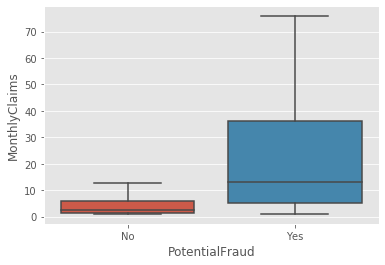

In [180]:
prov = monthly.groupby('Provider')['MonthlyClaims'].mean().reset_index()

prov2= pd.merge(prov, train_potentialfraud, on='Provider', how='left')

sns.boxplot(x='PotentialFraud', y='MonthlyClaims', data=prov2, showfliers=False)

Text(0.5, 1.0, 'Providers Monthly Claims')

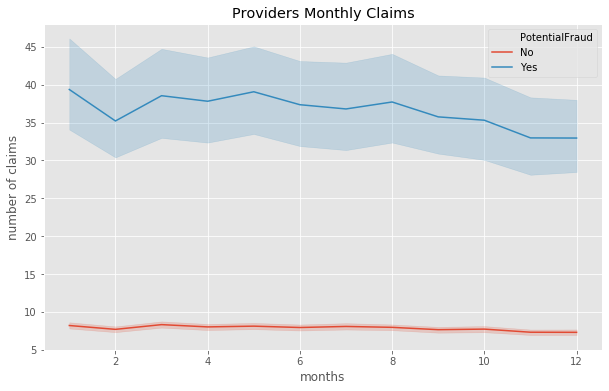

In [123]:
monthly2 = pd.merge(monthly, train_potentialfraud, on='Provider', how='left')

f, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='startClaimMonth', y='MonthlyClaims', data=monthly2, hue='PotentialFraud')
plt.xlabel('months')
plt.ylabel('number of claims')
plt.title('Providers Monthly Claims')

## Feature Engineering

- add monthly claims

In [ ]:
trainProvider6 = pd.merge(trainProvider5, monthly, on='Provider', how='left')
trainProvider6.shape

## Unsupervised Clustering
- We would like to study the affinity of the providers. We can **embed** the providers into some Euclidean
 space based on several ideas.
  - Base on the monthly claim patterns studied in the above **time series analysis**. 
  - Base on the **bag of words** model applied to the patients' inpatient/outpatient diagnosis codes/procedure codes
    or the patients' pre-existing chronic conditions.
- Because there are so many diagnosis/procedure codes, select the most frequent diagnosis codes as your features.    
- Basically each claim can be viewed as a 'document'. Each diagnosis/procedure code or a pre-existing
condition can be viewed as a 'term'. The idea of **bag-of-word** model allows us to generate
a 'document-term matrix' of word-counts.
- For the patient pre-existing chronic conditions, we may opt to treat multiple visits of the same patients
to the same provider as a single sample.

- Once we have a specified **provider** embedding, we may apply a clustering technique to
analyze the dis-similarities of the providers.
- Start with **kmeans**, **hierarchical clustering**, and extend into other clustering techniques.
- You may decide if you need to normalize the columns if necessary.
- Provide insights on how different providers behave similarly.
- How would you decide if your clustering result would have any relevance to identify **PotentialFraud**?


In [ ]:
full_data.ClmAdmitDiagnosisCode.value_counts()[:10].reset_index().rename(columns={})

In [ ]:
diagCode = full_data.groupby('ClmAdmitDiagnosisCode')['ClaimID'].count().reset_index(name='count')
diagCode.loc[diagCode['count'] >= 2000]

codes = pd.merge(diagCode, full_data, on='ClmAdmitDiagnosisCode', how='left')
codes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(codes)
# print(X.toarray())

cv = CountVectorizer()



cv.fit(codes['ClmAdmitDiagnosisCode'])

results = cv.transform(codes['ClmAdmitDiagnosisCode'])



features = cv.get_feature_names()
df_res = pd.DataFrame(results.toarray(), columns=features)


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans()

kmeans.set_params(n_clusters=10)
kmeans.fit(results)

In [ ]:
kmeans.cluster_centers_

### kmeans.labels_

In [ ]:
from PlottingFunctions import plot_inertia, plot_silhouette

plot_silhouette(kmeans, df_res)

###  Code V7612 has the highest number of claims from week 1 up to week 15 and also had the highest drops of claims.
###  Most of the codes shows a decline of claims as the week progresses.

In [ ]:
ax, f = plt.subplots(figsize=(10, 6))
sns.lineplot(data =week_diag, x= 'startClaimWeek', y= 'numClaims', hue='ClmAdmitDiagnosisCode', style='ClmAdmitDiagnosisCode')
plt.title('Weekly Claims Of Top Diagnosis Code')
plt.xlabel('week claim')
plt.ylabel('number of claims')

In [ ]:
trainProvider = pd.merge(trainProvider, duration, on='Provider', how='left')
trainProvider.sample(2)

In [ ]:
clmDiagnosis = inpatient.ClmAdmitDiagnosisCode.value_counts()[:10].reset_index()
clmDiagnosis = pd.DataFrame(clmDiagnosis).rename(columns={'index':'ClmAdmitDiagnosisCode', 'ClmAdmitDiagnosisCode':'count'})
clmDiagnosis

duration = full_data[['ClmAdmitDiagnosisCode', 'duration']].copy()

duration_diag = pd.merge(clmDiagnosis, duration, on='ClmAdmitDiagnosisCode', how='left')


### Patient with diagnosis code V5789 had the highest median duration which is around 15 days.

In [ ]:
ax, f= plt.subplots(figsize=(12, 6))
sns.violinplot(x='ClmAdmitDiagnosisCode', y='duration', data=duration_diag, showfliers=False)
plt.title('Duration Of Treatments Of Top Diagnosis Code')
plt.xlabel('diagnosis code')
plt.ylabel('duration of treatment in days')

### Warmup Question 5: From Which Providers Do the Duplicated Claims Come From?
- An easier type of frauds is to submit duplicated claims using stolen patient IDs.
- While multiple claims with identical information are not always fraudulent, the prevalence of
these duplicated records would signal potential fraud activities. 
- Consider the various diagnosis codes, procedure codes, admit diagnosis codes as the key features, please identify
the duplicated claims in the inpatients_train, outpatients_train data.
- Are these potentially fradulent providers duplicating their own medical records, or are they
using the records from the other providers?
- Assuming that the claimStartDates are authentic, identify the providers which are the information
receivers. Identify the providers which are the information givers.
- Summarize the duplicate record counts/provider and study if the statistics have different
distributions between honest and potentialfraud providers.
- Do these potentially fraud providers reuse doctor IDs and/or patient IDs?  If so, these 
fradulent IDs (or if the doctors or patients willingly participate) can be used as signals to
the other types of fraudulent activities.
- Do these duplicated records show any anomaly in terms of geographic locations?
Even though the original data doesn't specify the providers nor the doctors' practice locations,
one may use the majority of the patients' residence state/county information to infer their
physical locations.
- Base on your best knowledge of suspicious activities in duplicating the patient claims, flag
the providers accordingly. Compare with the **PotentialFraud** flags offered by the dataset and discuss.

### Consider the various diagnosis codes, procedure codes, admit diagnosis codes as the key features, please identify the duplicated claims in the inpatients_train, outpatients_train data.

In [304]:
dup_claims = full_data.filter(regex='ClmAdmitDiagnosisCode|DiagnosisGroupCode|ClmDiagnosisCode|ClmProcedureCode')
patient_claims = full_data[['ClaimID', 'patientType']]

dup_claims = dup_claims. duplicated(keep=False).reset_index(name='dup')

dup_claims = pd.concat([patient_claims, dup_claims], axis=1).drop('index', axis=1)
dup_claims=dup_claims.loc[dup_claims.dup==True]
dup_claims

,ClaimID,patientType,dup
34,CLM32146,inpatient,True
35,CLM82202,inpatient,True
52,CLM40640,inpatient,True
1039,CLM72395,inpatient,True
2021,CLM59863,inpatient,True
...,...,...,...
558199,CLM172248,outpatient,True
558200,CLM189011,outpatient,True
558201,CLM255268,outpatient,True
558208,CLM596444,outpatient,True


### Are these potentially fradulent providers duplicating their own medical records, or are they using the records from the other providers?

In [ ]:
provider = full_data[['ClaimID', 'Provider']].copy()

provider_dup = pd.merge(dup_claims, provider, on='ClaimID', how='left')
provider_dup.groupby('Provider')['ClaimID'].count().reset_index(name='numDupClaims')

### Assuming that the claimStartDates are authentic, identify the providers which are the information receivers. Identify the providers which are the information givers.

In [ ]:
full_data[['Provider','ClaimStartDt']]

### Market Basket Analysis (Associative Rule Mining)
- Traditionally in supermarkets or e-commerces, it is important to analyze the purchase patterns
    of their customers. For example, the retailers often want to know
     - what are the frequently purchased items?
     - conditioning on the purchasing of some item $A$ (or a set of items), 
    what other items $B$ are likely to be purchased in the same transaction?
- There are several terminologies used in **MBA**, like support, confidence, lift, conviction, which are
filtered based on the most popular **apriori** algorithm.
- **support**: sample probability of a pattern to occur in the dataset.
- **confidence**: the conditional probability of $P(B|A)={P(A,B)\over P{A}}$, where $A$, $B$ are
    two disjoint sets of items.
- **lift**: The measure of event independence $P(A,B)\over P(A)\cdot P(B)$.
- **conviction**: $P(\sim B)\over P(\sim B|A)$, which gauges whether $A\mapsto \sim B$ is purely by chance.
  $\sim B$ is the event that item sets in $B$ are **absent**, with $P(\sim B) = 1-P(B)$.  
- There are multiple python packages which handle **associative rule mining**, pip install 
**apyori** or **mlxtend** to start your **MBA**.
- In the following, we apply the machinery of **MBA** to analyze transaction-like data.

In [ ]:
chronic= full_data.filter(regex='Chronic').replace(to_replace=2, value=0)
chronic.columns = [col.replace('ChronicCond_', '') for col in chronic.columns]

chronic


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [ ]:
frequent_itemsets = apriori(chronic, min_support=0.07,  use_colnames=True)


In [ ]:
frequent_itemsets.sort_values(by='support', ascending=False)

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

In [ ]:
rules2 = rules.loc[(rules.support> 0.2)&(rules.confidence>0.9)].reset_index()

rules2

In [ ]:
import networkx as nx

In [ ]:
plt.figure(figsize=(20,20))
G = nx.from_pandas_edgelist(rules2, 'antecedents', 'consequents', edge_attr=True)
nx.draw(G, pos=nx.spring_layout(G), node_size=300, with_labels=True)


In [273]:
a= full_data.groupby(['Provider', 'State'])['State'].count().reset_index(name='a').groupby('Provider')['State'].count().\
reset_index(name='numStates')

In [274]:
z=full_data.groupby(['Provider', 'County'])['County'].count().reset_index(name='a').groupby('Provider')['County'].count().\
reset_index(name='numCounties')

In [275]:
v=full_data.groupby(['Provider', 'ClmAdmitDiagnosisCode'])['ClmAdmitDiagnosisCode'].count().reset_index(name='a').groupby('Provider')['ClmAdmitDiagnosisCode'].count().\
reset_index(name='numDiffDiagnosisCode')

In [560]:
p=full_data.groupby(['Provider', 'DiagnosisGroupCode'])['DiagnosisGroupCode'].count().reset_index(name='a').groupby('Provider')['DiagnosisGroupCode'].count().\
reset_index(name='numDiffGroupDiagCode')


groupCode = pd.merge(train_potentialfraud, p, on='Provider', how='left')

groupCode = groupCode.fillna(0)


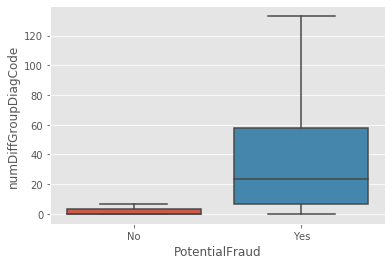

In [563]:
sns.boxplot(x='PotentialFraud', y='numDiffGroupDiagCode', data=groupCode, showfliers=False)

## Adding more features


In [36]:
train_data = pd.read_pickle("train_dataset.pkl")


In [37]:
train_data

,Provider,PotentialFraud,DaysAdmitted,DeductibleAmtPaid,InscClaimAmtReimbursed,InscCoveredPercent,TotalClaimAmount,DailyTotalCharge,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,TotalAnnClaimAmt,NumOfDoctors,NumOfPatients,ServiceType,NumOfClms,WeeklyClaims,MonthlyClaims,numStates,numCounties,AvgChronic,AvgClaim,numDiffDiagnosisCode,numDiffGroupDiagCode,AvgAgeWhenServed,NumOfDuplicatedBeneID,NumOfDuplicatedAttendingPhysician,NumOfDuplicatedClaims,ChronicCond0,ChronicCond1,ChronicCond2,ChronicCond3,ChronicCond4,ChronicCond5,ChronicCond6,ChronicCond7,ChronicCond8,ChronicCond9,ChronicCond10,ChronicCond11,ChronicCond12,Gender1,Gender2,Race1,Race2,Race3,Race5
0,PRV51001,No,2.440000,213.600000,4185.600000,0.975656,4399.200000,1061.072000,17606.000000,897.120000,2615.200000,463.920000,21582.240000,14,24,both,25,25,25,1,7,5.888889,2.777778,11.0,5.0,77.729167,0.0,3.0,11.0,0.0,1.0,0.0,2.0,4.0,2.0,6.0,4.0,3.0,1.0,0.0,1.0,0.0,9,15,20,4,0,0
1,PRV51003,Yes,4.674242,502.166667,4588.409091,0.912167,5090.575758,1298.615410,7568.181818,931.424242,2678.181818,737.121212,11914.909091,44,117,both,132,132,132,3,23,5.000000,12.000000,58.0,58.0,68.485755,0.0,3.0,25.0,7.0,1.0,14.0,22.0,15.0,20.0,12.0,11.0,8.0,5.0,2.0,0.0,0.0,49,68,94,22,0,1
2,PRV51004,No,2.429530,2.080537,350.134228,0.978485,352.214765,250.363050,4351.879195,434.953020,2194.899329,622.751678,7604.483221,38,138,outpatient,149,149,149,9,28,4.500000,14.900000,25.0,0.0,71.937802,2.0,16.0,72.0,8.0,12.0,13.0,27.0,11.0,16.0,18.0,11.0,12.0,8.0,2.0,0.0,0.0,45,93,113,20,5,0
3,PRV51005,Yes,2.088412,3.175966,241.124464,0.980747,244.300429,196.533055,3623.991416,379.162232,2109.733906,636.328755,6749.216309,6,495,outpatient,1165,1165,1165,4,26,4.500000,116.500000,158.0,0.0,69.503649,113.0,6.0,530.0,38.0,52.0,57.0,72.0,69.0,55.0,59.0,48.0,27.0,17.0,1.0,0.0,0.0,208,287,382,110,3,0
4,PRV51007,No,1.958333,45.333333,468.194444,0.985303,513.527778,243.681944,3050.000000,445.000000,1729.722222,469.722222,5694.444444,10,58,both,72,72,72,2,6,4.000000,8.000000,17.0,3.0,67.491379,3.0,3.0,29.0,5.0,5.0,8.0,7.0,8.0,8.0,5.0,6.0,6.0,0.0,0.0,0.0,0.0,27,31,47,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,No,3.142857,4.642857,380.000000,0.983401,384.642857,200.629252,3962.142857,457.714286,3241.785714,886.785714,8548.428571,1,24,outpatient,28,28,28,1,2,5.500000,2.800000,3.0,0.0,73.916667,3.0,1.0,15.0,0.0,1.0,1.0,4.0,1.0,7.0,3.0,3.0,0.0,3.0,1.0,0.0,0.0,13,11,19,1,0,4
5406,PRV57760,No,1.318182,0.000000,216.818182,1.000000,216.818182,216.022727,2785.454545,436.909091,1492.727273,805.454545,5520.545455,3,9,outpatient,22,22,22,1,3,4.600000,4.400000,7.0,0.0,64.666667,3.0,1.0,13.0,0.0,0.0,2.0,4.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6,3,7,2,0,0
5407,PRV57761,No,2.390244,4.512195,225.243902,0.935979,229.756098,157.134674,7026.585366,586.097561,2928.414634,707.317073,11248.414634,2,67,outpatient,82,82,82,1,2,4.500000,8.200000,16.0,0.0,73.800995,3.0,2.0,32.0,2.0,5.0,9.0,6.0,9.0,7.0,6.0,8.0,6.0,7.0,2.0,0.0,0.0,33,34,58,5,1,3
5408,PRV57762,No,1.000000,0.000000,1900.000000,1.000000,1900.000000,1900.000000,15000.000000,1068.000000,2540.000000,400.000000,19008.000000,1,1,outpatient,1,1,1,1,1,5.000000,1.000000,1.0,0.0,67.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0


In [38]:
train_data.drop(['WeeklyClaims', 'MonthlyClaims', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
                'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'DeductibleAmtPaid',
                'InscClaimAmtReimbursed'], axis=1, inplace=True)

In [39]:
train_data

,Provider,PotentialFraud,DaysAdmitted,InscCoveredPercent,TotalClaimAmount,DailyTotalCharge,TotalAnnClaimAmt,NumOfDoctors,NumOfPatients,ServiceType,NumOfClms,numStates,numCounties,AvgChronic,AvgClaim,numDiffDiagnosisCode,numDiffGroupDiagCode,AvgAgeWhenServed,NumOfDuplicatedBeneID,NumOfDuplicatedAttendingPhysician,NumOfDuplicatedClaims,ChronicCond0,ChronicCond1,ChronicCond2,ChronicCond3,ChronicCond4,ChronicCond5,ChronicCond6,ChronicCond7,ChronicCond8,ChronicCond9,ChronicCond10,ChronicCond11,ChronicCond12,Gender1,Gender2,Race1,Race2,Race3,Race5
0,PRV51001,No,2.440000,0.975656,4399.200000,1061.072000,21582.240000,14,24,both,25,1,7,5.888889,2.777778,11.0,5.0,77.729167,0.0,3.0,11.0,0.0,1.0,0.0,2.0,4.0,2.0,6.0,4.0,3.0,1.0,0.0,1.0,0.0,9,15,20,4,0,0
1,PRV51003,Yes,4.674242,0.912167,5090.575758,1298.615410,11914.909091,44,117,both,132,3,23,5.000000,12.000000,58.0,58.0,68.485755,0.0,3.0,25.0,7.0,1.0,14.0,22.0,15.0,20.0,12.0,11.0,8.0,5.0,2.0,0.0,0.0,49,68,94,22,0,1
2,PRV51004,No,2.429530,0.978485,352.214765,250.363050,7604.483221,38,138,outpatient,149,9,28,4.500000,14.900000,25.0,0.0,71.937802,2.0,16.0,72.0,8.0,12.0,13.0,27.0,11.0,16.0,18.0,11.0,12.0,8.0,2.0,0.0,0.0,45,93,113,20,5,0
3,PRV51005,Yes,2.088412,0.980747,244.300429,196.533055,6749.216309,6,495,outpatient,1165,4,26,4.500000,116.500000,158.0,0.0,69.503649,113.0,6.0,530.0,38.0,52.0,57.0,72.0,69.0,55.0,59.0,48.0,27.0,17.0,1.0,0.0,0.0,208,287,382,110,3,0
4,PRV51007,No,1.958333,0.985303,513.527778,243.681944,5694.444444,10,58,both,72,2,6,4.000000,8.000000,17.0,3.0,67.491379,3.0,3.0,29.0,5.0,5.0,8.0,7.0,8.0,8.0,5.0,6.0,6.0,0.0,0.0,0.0,0.0,27,31,47,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,No,3.142857,0.983401,384.642857,200.629252,8548.428571,1,24,outpatient,28,1,2,5.500000,2.800000,3.0,0.0,73.916667,3.0,1.0,15.0,0.0,1.0,1.0,4.0,1.0,7.0,3.0,3.0,0.0,3.0,1.0,0.0,0.0,13,11,19,1,0,4
5406,PRV57760,No,1.318182,1.000000,216.818182,216.022727,5520.545455,3,9,outpatient,22,1,3,4.600000,4.400000,7.0,0.0,64.666667,3.0,1.0,13.0,0.0,0.0,2.0,4.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6,3,7,2,0,0
5407,PRV57761,No,2.390244,0.935979,229.756098,157.134674,11248.414634,2,67,outpatient,82,1,2,4.500000,8.200000,16.0,0.0,73.800995,3.0,2.0,32.0,2.0,5.0,9.0,6.0,9.0,7.0,6.0,8.0,6.0,7.0,2.0,0.0,0.0,33,34,58,5,1,3
5408,PRV57762,No,1.000000,1.000000,1900.000000,1900.000000,19008.000000,1,1,outpatient,1,1,1,5.000000,1.000000,1.0,0.0,67.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0


In [40]:
opPhy = full_data.groupby(['Provider', 'OperatingPhysician'])['OperatingPhysician'].count().reset_index(name='a').\
groupby('Provider')['a'].count().reset_index(name= 'NumDistincOpPhy')
opPhy

,Provider,NumDistincOpPhy
0,PRV51001,5
1,PRV51003,7
2,PRV51004,19
3,PRV51005,6
4,PRV51007,5
...,...,...
4848,PRV57757,3
4849,PRV57759,1
4850,PRV57760,2
4851,PRV57761,5


In [41]:
train_data2 = pd.merge(train_data, opPhy, on='Provider', how='left')

In [42]:
train_data2['NumDistincOpPhy'] = train_data2['NumDistincOpPhy'].fillna(0)

In [43]:
otherPhy = full_data.groupby(['Provider', 'OtherPhysician'])['OtherPhysician'].count().reset_index(name='a').\
groupby('Provider')['a'].count().reset_index(name= 'NumDistincOtherPhy')
otherPhy

,Provider,NumDistincOtherPhy
0,PRV51001,8
1,PRV51003,22
2,PRV51004,26
3,PRV51005,4
4,PRV51007,7
...,...,...
4873,PRV57757,1
4874,PRV57759,1
4875,PRV57760,2
4876,PRV57761,2


In [44]:
train_data3 = pd.merge(train_data2, otherPhy, on='Provider', how='left')

In [45]:
train_data3['NumDistincOtherPhy'] = train_data3['NumDistincOtherPhy'].fillna(0)

In [190]:
train_data3['PotentialFraud'] = train_data3['PotentialFraud'].apply(lambda x : 1 if x=='Yes' else 0)

In [303]:
full_data.filter(regex='ClmDiagnosis')

,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10
0,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN
1,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN
3,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN
4,042,3051,34400,5856,42732,486,5119,29620,20300,NaN
...,...,...,...,...,...,...,...,...,...,...
558206,2163,V4575,53190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558207,07041,5781,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558208,V570,78079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [469]:
train_data3

,Provider,PotentialFraud,DaysAdmitted,InscCoveredPercent,TotalClaimAmount,DailyTotalCharge,TotalAnnClaimAmt,NumOfDoctors,NumOfPatients,ServiceType,NumOfClms,numStates,numCounties,AvgChronic,AvgClaim,numDiffDiagnosisCode,numDiffGroupDiagCode,AvgAgeWhenServed,NumOfDuplicatedBeneID,NumOfDuplicatedAttendingPhysician,NumOfDuplicatedClaims,ChronicCond0,ChronicCond1,ChronicCond2,ChronicCond3,ChronicCond4,ChronicCond5,ChronicCond6,ChronicCond7,ChronicCond8,ChronicCond9,ChronicCond10,ChronicCond11,ChronicCond12,Gender1,Gender2,Race1,Race2,Race3,Race5,NumDistincOpPhy,NumDistincOtherPhy
0,PRV51001,0,2.440000,0.975656,4399.200000,1061.072000,21582.240000,14,24,both,25,1,7,5.888889,2.777778,11.0,5.0,77.729167,0.0,3.0,11.0,0.0,1.0,0.0,2.0,4.0,2.0,6.0,4.0,3.0,1.0,0.0,1.0,0.0,9,15,20,4,0,0,5.0,8.0
1,PRV51003,1,4.674242,0.912167,5090.575758,1298.615410,11914.909091,44,117,both,132,3,23,5.000000,12.000000,58.0,58.0,68.485755,0.0,3.0,25.0,7.0,1.0,14.0,22.0,15.0,20.0,12.0,11.0,8.0,5.0,2.0,0.0,0.0,49,68,94,22,0,1,7.0,22.0
2,PRV51004,0,2.429530,0.978485,352.214765,250.363050,7604.483221,38,138,outpatient,149,9,28,4.500000,14.900000,25.0,0.0,71.937802,2.0,16.0,72.0,8.0,12.0,13.0,27.0,11.0,16.0,18.0,11.0,12.0,8.0,2.0,0.0,0.0,45,93,113,20,5,0,19.0,26.0
3,PRV51005,1,2.088412,0.980747,244.300429,196.533055,6749.216309,6,495,outpatient,1165,4,26,4.500000,116.500000,158.0,0.0,69.503649,113.0,6.0,530.0,38.0,52.0,57.0,72.0,69.0,55.0,59.0,48.0,27.0,17.0,1.0,0.0,0.0,208,287,382,110,3,0,6.0,4.0
4,PRV51007,0,1.958333,0.985303,513.527778,243.681944,5694.444444,10,58,both,72,2,6,4.000000,8.000000,17.0,3.0,67.491379,3.0,3.0,29.0,5.0,5.0,8.0,7.0,8.0,8.0,5.0,6.0,6.0,0.0,0.0,0.0,0.0,27,31,47,11,0,0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,0,3.142857,0.983401,384.642857,200.629252,8548.428571,1,24,outpatient,28,1,2,5.500000,2.800000,3.0,0.0,73.916667,3.0,1.0,15.0,0.0,1.0,1.0,4.0,1.0,7.0,3.0,3.0,0.0,3.0,1.0,0.0,0.0,13,11,19,1,0,4,1.0,1.0
5406,PRV57760,0,1.318182,1.000000,216.818182,216.022727,5520.545455,3,9,outpatient,22,1,3,4.600000,4.400000,7.0,0.0,64.666667,3.0,1.0,13.0,0.0,0.0,2.0,4.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6,3,7,2,0,0,2.0,2.0
5407,PRV57761,0,2.390244,0.935979,229.756098,157.134674,11248.414634,2,67,outpatient,82,1,2,4.500000,8.200000,16.0,0.0,73.800995,3.0,2.0,32.0,2.0,5.0,9.0,6.0,9.0,7.0,6.0,8.0,6.0,7.0,2.0,0.0,0.0,33,34,58,5,1,3,5.0,2.0
5408,PRV57762,0,1.000000,1.000000,1900.000000,1900.000000,19008.000000,1,1,outpatient,1,1,1,5.000000,1.000000,1.0,0.0,67.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0.0,0.0


In [265]:
train_data3.PotentialFraud.value_counts()

0    4904
1     506
Name: PotentialFraud, dtype: int64

In [669]:
train_data3=train_data3.rename(columns={'numDiffDiagnosisCode':'NumUniqClmAdmitDiagCOde',
                                        'numDiffGroupDiagCode':'NumUniqGroupDiagCode'})
train_data3

,Provider,PotentialFraud,DaysAdmitted,InscCoveredPercent,TotalClaimAmount,DailyTotalCharge,TotalAnnClaimAmt,NumOfDoctors,NumOfPatients,ServiceType,NumOfClms,numStates,numCounties,AvgChronic,AvgClaim,NumUniqClmAdmitDiagCOde,NumUniqGroupDiagCode,AvgAgeWhenServed,NumOfDuplicatedBeneID,NumOfDuplicatedAttendingPhysician,NumOfDuplicatedClaims,ChronicCond0,ChronicCond1,ChronicCond2,ChronicCond3,ChronicCond4,ChronicCond5,ChronicCond6,ChronicCond7,ChronicCond8,ChronicCond9,ChronicCond10,ChronicCond11,ChronicCond12,Gender1,Gender2,Race1,Race2,Race3,Race5,NumDistincOpPhy,NumDistincOtherPhy
0,PRV51001,0,2.440000,0.975656,4399.200000,1061.072000,21582.240000,14,24,both,25,1,7,5.888889,2.777778,11.0,5.0,77.729167,0.0,3.0,11.0,0.0,1.0,0.0,2.0,4.0,2.0,6.0,4.0,3.0,1.0,0.0,1.0,0.0,9,15,20,4,0,0,5.0,8.0
1,PRV51003,1,4.674242,0.912167,5090.575758,1298.615410,11914.909091,44,117,both,132,3,23,5.000000,12.000000,58.0,58.0,68.485755,0.0,3.0,25.0,7.0,1.0,14.0,22.0,15.0,20.0,12.0,11.0,8.0,5.0,2.0,0.0,0.0,49,68,94,22,0,1,7.0,22.0
2,PRV51004,0,2.429530,0.978485,352.214765,250.363050,7604.483221,38,138,outpatient,149,9,28,4.500000,14.900000,25.0,0.0,71.937802,2.0,16.0,72.0,8.0,12.0,13.0,27.0,11.0,16.0,18.0,11.0,12.0,8.0,2.0,0.0,0.0,45,93,113,20,5,0,19.0,26.0
3,PRV51005,1,2.088412,0.980747,244.300429,196.533055,6749.216309,6,495,outpatient,1165,4,26,4.500000,116.500000,158.0,0.0,69.503649,113.0,6.0,530.0,38.0,52.0,57.0,72.0,69.0,55.0,59.0,48.0,27.0,17.0,1.0,0.0,0.0,208,287,382,110,3,0,6.0,4.0
4,PRV51007,0,1.958333,0.985303,513.527778,243.681944,5694.444444,10,58,both,72,2,6,4.000000,8.000000,17.0,3.0,67.491379,3.0,3.0,29.0,5.0,5.0,8.0,7.0,8.0,8.0,5.0,6.0,6.0,0.0,0.0,0.0,0.0,27,31,47,11,0,0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,0,3.142857,0.983401,384.642857,200.629252,8548.428571,1,24,outpatient,28,1,2,5.500000,2.800000,3.0,0.0,73.916667,3.0,1.0,15.0,0.0,1.0,1.0,4.0,1.0,7.0,3.0,3.0,0.0,3.0,1.0,0.0,0.0,13,11,19,1,0,4,1.0,1.0
5406,PRV57760,0,1.318182,1.000000,216.818182,216.022727,5520.545455,3,9,outpatient,22,1,3,4.600000,4.400000,7.0,0.0,64.666667,3.0,1.0,13.0,0.0,0.0,2.0,4.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6,3,7,2,0,0,2.0,2.0
5407,PRV57761,0,2.390244,0.935979,229.756098,157.134674,11248.414634,2,67,outpatient,82,1,2,4.500000,8.200000,16.0,0.0,73.800995,3.0,2.0,32.0,2.0,5.0,9.0,6.0,9.0,7.0,6.0,8.0,6.0,7.0,2.0,0.0,0.0,33,34,58,5,1,3,5.0,2.0
5408,PRV57762,0,1.000000,1.000000,1900.000000,1900.000000,19008.000000,1,1,outpatient,1,1,1,5.000000,1.000000,1.0,0.0,67.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0.0,0.0


## Up-Sampling the Minority Class

 One technique to train an imbalanced classification model is to fabricate synthesized minority class data, knowning as
**up-sampling**. Up-sampling bootstraps only the minority class samples to make the major:minor ratio more balanced


In [199]:
from sklearn.utils import resample


In [670]:
minorIndex = train_data3[train_data3['PotentialFraud']==1].Provider.values

resampled = resample(minorIndex, n_samples=4904-506)
LEFT = pd.DataFrame(list(train_data3.Provider) + list(resampled), columns=['INDEX'])

train_data = pd.merge(LEFT, train_data3, how='left', left_on ='INDEX', right_on='Provider')


In [671]:
train_data['PotentialFraud'].value_counts()

1    4904
0    4904
Name: PotentialFraud, dtype: int64

In [672]:
# Dummify the ServiceType
dummy = pd.get_dummies(train_data['ServiceType'], drop_first=True)

train_data2= pd.concat([train_data, dummy], axis=1).drop('ServiceType', axis=1)
train_data2.sample(2)

,INDEX,Provider,PotentialFraud,DaysAdmitted,InscCoveredPercent,TotalClaimAmount,DailyTotalCharge,TotalAnnClaimAmt,NumOfDoctors,NumOfPatients,NumOfClms,numStates,numCounties,AvgChronic,AvgClaim,NumUniqClmAdmitDiagCOde,NumUniqGroupDiagCode,AvgAgeWhenServed,NumOfDuplicatedBeneID,NumOfDuplicatedAttendingPhysician,NumOfDuplicatedClaims,ChronicCond0,ChronicCond1,ChronicCond2,ChronicCond3,ChronicCond4,ChronicCond5,ChronicCond6,ChronicCond7,ChronicCond8,ChronicCond9,ChronicCond10,ChronicCond11,ChronicCond12,Gender1,Gender2,Race1,Race2,Race3,Race5,NumDistincOpPhy,NumDistincOtherPhy,inpatient,outpatient
133,PRV51171,PRV51171,0,2.576271,0.956933,237.627119,137.238840,9331.966102,38,59,59,16,24,4.5,5.900000,9.0,0.0,72.406780,0.0,5.0,27.0,2.0,8.0,4.0,9.0,6.0,5.0,11.0,2.0,7.0,3.0,2.0,0.0,0.0,26,33,52,4,3,0,12.0,15.0,0,1
4771,PRV56978,PRV56978,0,2.383333,0.974803,203.000000,165.039316,8516.116667,1,97,120,2,2,5.0,10.909091,32.0,0.0,72.130584,4.0,1.0,58.0,6.0,5.0,11.0,15.0,15.0,12.0,12.0,14.0,3.0,2.0,2.0,0.0,0.0,49,48,81,7,5,4,1.0,1.0,0,1


## Stochastic Gradient Descent Classifier

In [592]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale

In [674]:
#Scale the features
X= train_data2.drop(['Provider', 'PotentialFraud', 'INDEX'], axis=1)
scaled_X = scale(X)
Y= train_data2['PotentialFraud']


In [594]:
# Split the data into training and testing data
np.random.seed(4)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.2, random_state=42, stratify=Y)


In [595]:
sgd = SGDClassifier()
sgd.set_params(max_iter=2000, loss='log')
np.random.seed(4)

grid_param = [{
    "alpha": [1e-4, 1e-3, 1e-2, 1e-1, 1e2, 1e3],
    "penalty" : ['l1', 'l2']
     }]

sgd_search = GridSearchCV(estimator=sgd, param_grid=grid_param, scoring='accuracy', cv=5,
                          n_jobs=-1, return_train_score=True)
sgd_search = sgd_search.fit(X_train, y_train)

In [596]:
sgd_search.best_params_

{'alpha': 0.01, 'penalty': 'l2'}

In [597]:
sgd_search.best_score_

0.8673220396779968

In [600]:
sgd_pred =sgd_search.best_estimator_.predict(X_test)

confusion_matrix(y_test, sgd_pred)
(836+846)/(836+846+145+135)

0.8572884811416922

## Penalized Logistic Regression

In [601]:
from sklearn import linear_model
logit= linear_model.LogisticRegression(solver='liblinear', penalty='l1')


In [602]:
grid_param = [{
    "C": np.linspace(0.1,20.1,20)
   }]

In [336]:
np.random.seed(5)

logit_search= GridSearchCV(logit, param_grid=grid_param, scoring='accuracy', cv=5,
                          n_jobs=-1, return_train_score=True)
logit_search= logit_search.fit(X_train, y_train)

In [603]:
logit_search.best_params_

{'C': 1.1526315789473685}

In [604]:
logit_search.best_score_

0.8691061286957087

In [607]:
logit_pred =logit_search.best_estimator_.predict(X_test)

confusion_matrix(y_test, logit_pred)
(849+839)/(849+132+142+839)

0.8603465851172273

In [675]:
feature_importance = list(zip(X.columns,list(logit_search.best_estimator_.coef_)[0]))
feature_importance


[('DaysAdmitted', 0.21531865570177106),
 ('InscCoveredPercent', 0.04977839942070769),
 ('TotalClaimAmount', 0.029793634751938705),
 ('DailyTotalCharge', 0.44708999924287024),
 ('TotalAnnClaimAmt', -0.024934260443668),
 ('NumOfDoctors', 0.0),
 ('NumOfPatients', 0.0),
 ('NumOfClms', 0.4181637328430014),
 ('numStates', 0.19021529224842681),
 ('numCounties', 0.1418780965873579),
 ('AvgChronic', 0.02019853764216961),
 ('AvgClaim', 0.0),
 ('NumUniqClmAdmitDiagCOde', 2.6452331579057216),
 ('NumUniqGroupDiagCode', 1.500168113493959),
 ('AvgAgeWhenServed', -0.041008631534723027),
 ('NumOfDuplicatedBeneID', 0.4870157411651112),
 ('NumOfDuplicatedAttendingPhysician', 0.02349229278575192),
 ('NumOfDuplicatedClaims', 0.38311377531641866),
 ('ChronicCond0', 0.5292401003243684),
 ('ChronicCond1', 0.0),
 ('ChronicCond2', -0.983672552847843),
 ('ChronicCond3', -1.6706759527362154),
 ('ChronicCond4', 0.1403399025045783),
 ('ChronicCond5', 0.0),
 ('ChronicCond6', 0.0),
 ('ChronicCond7', 0.0),
 ('ChronicC

## Random Forest Classifier

In [609]:
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder
randomForest = ensemble.RandomForestClassifier()
le =LabelEncoder()

In [676]:
serviceType =le.fit_transform(train_data_resampled['ServiceType'])


In [677]:
train_nonlinear= train_data.copy()
train_nonlinear['ServiceType'] = serviceType

features = train_nonlinear.drop(['Provider', 'PotentialFraud', 'INDEX'], axis=1)
target= train_nonlinear['PotentialFraud']


In [612]:
np.random.seed(5)

X_trainN, X_testN, y_trainN, y_testN = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)


In [613]:
np.random.seed(5)
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10)
}

forest_search = GridSearchCV(randomForest, grid_param, scoring='accuracy', cv=5, n_jobs=-1)
forest_search = forest_search.fit(X_trainN, y_trainN)

In [614]:
forest_search.best_params_

{'criterion': 'gini', 'max_depth': 28, 'n_estimators': 30}

In [615]:
forest_search.best_score_

0.9754019964844337

In [617]:
forest_pred = forest_search.best_estimator_.predict(X_testN)
confusion_matrix(y_testN, forest_pred)
(946+976)/(946+35+5+976)

0.9796126401630989

In [678]:
#Feature importance
sorted_importance = sorted(zip(features.columns, forest_search.best_estimator_.feature_importances_), key=lambda t:t[1], reverse=True)[:15]
sorted_importance.sort(key= lambda t : t[1])


Text(0.5, 1.0, 'Feature Importance Random Forest Classifier')

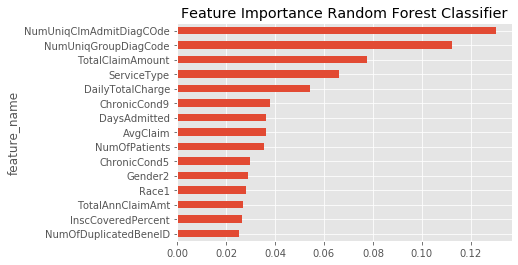

In [679]:
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists

pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.barh(x='feature_name',y='importance_score', legend=None)
plt.title('Feature Importance Random Forest Classifier')

## Random Forest Imbalanced Data

In [682]:
forest_im = ensemble.RandomForestClassifier(class_weight='balanced')
le =LabelEncoder()
serviceType =le.fit_transform(train_data3['ServiceType'])


train_im= train_data3.copy()
train_im['ServiceType'] = serviceType

features_im = train_im.drop(['Provider', 'PotentialFraud'], axis=1)
target_im = train_im['PotentialFraud']

In [622]:
np.random.seed(5)

X_trainM, X_testM, y_trainM, y_testM = train_test_split(features_im, target_im, test_size=0.2, random_state=42, stratify=target_im)


In [623]:
np.random.seed(6)
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10)
}

im_search = GridSearchCV(forest_im, grid_param, scoring='roc_auc', cv=5, n_jobs=-1)
im_search = im_search.fit(X_trainM, y_trainM)

In [624]:
im_search.best_params_

{'criterion': 'entropy', 'max_depth': 26, 'n_estimators': 90}

In [625]:
im_search.best_score_

0.9303530065010197

In [627]:
im_pred = im_search.best_estimator_.predict(X_testM)
roc_auc_score(y_testM, im_pred)

0.7393698085404871

In [683]:
#Feature importance
sorted_importance = sorted(zip(features_im.columns, im_search.best_estimator_.feature_importances_), key=lambda t:t[1], reverse=True)[:10]
sorted_importance.sort(key= lambda t : t[1])


Text(0.5, 1.0, 'Feature Importance Random Forest Classifier')

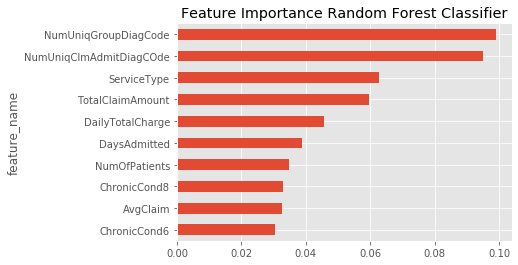

In [684]:
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists

pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.barh(x='feature_name',y='importance_score', legend=None)
plt.title('Feature Importance Random Forest Classifier')

## Gradient Boosting Classifier

In [631]:
gbc= ensemble.GradientBoostingClassifier()

np.random.seed(5)
grid_boost_para = [{
    "n_estimators": [500, 1000, 1500],
   "learning_rate":np.linspace(start=1e-2, stop=1, num=10) }]

grid_boost = GridSearchCV(gbc, grid_boost_para, scoring ='accuracy',cv=5, n_jobs=-1)
grid_boost.fit(X_trainN, y_trainN)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [632]:
grid_boost.best_params_

{'learning_rate': 0.34, 'n_estimators': 1000}

In [633]:
grid_boost.best_score_

0.9737454583835703

In [636]:
grid_boost_pred = grid_boost.best_estimator_.predict(X_testN)
confusion_matrix(y_testN, grid_boost_pred)
(948+979)/(948+33+2+979)

0.9821610601427115

In [685]:
#Feature importance
sorted_importance = sorted(zip(features.columns, grid_boost.best_estimator_.feature_importances_), key=lambda t:t[1], reverse=True)[:15]
sorted_importance.sort(key= lambda t : t[1])


Text(0.5, 1.0, 'Feature Importance Gradient Boosting Classifier')

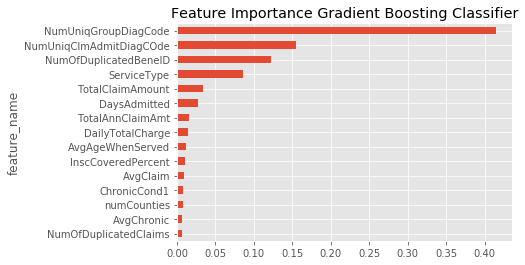

In [686]:
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists

pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.barh(x='feature_name',y='importance_score', legend=None)
plt.title('Feature Importance Gradient Boosting Classifier')

## Gradient boosting Classifier Imbalanced Data

In [640]:
np.random.seed(5)
gbc_im= ensemble.GradientBoostingClassifier()

grid_boost_para = [{
    "n_estimators": [100, 300, 500],
   "learning_rate":np.linspace(start=1e-2, stop=1, num=10) }]

boost_im= GridSearchCV(gbc_im, grid_boost_para, scoring = 'roc_auc', cv=5, n_jobs=-1)
boost_im.fit(X_trainM, y_trainM)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...e,
               

In [641]:
boost_im.best_params_

{'learning_rate': 0.12, 'n_estimators': 100}

In [642]:
boost_im.best_score_

0.9289772608736818

In [644]:
boost_im_pred = boost_im.best_estimator_.predict(X_testM)
roc_auc_score(y_testM, boost_im_pred)


0.7724942218992542

In [645]:
#Feature importance
sorted_importance = sorted(zip(features_im.columns, boost_im.best_estimator_.feature_importances_), key=lambda t:t[1], reverse=True)[:20]
sorted_importance.sort(key= lambda t : t[1])


Text(0.5, 1.0, 'Feature Importance Gradient Boosting Classifier')

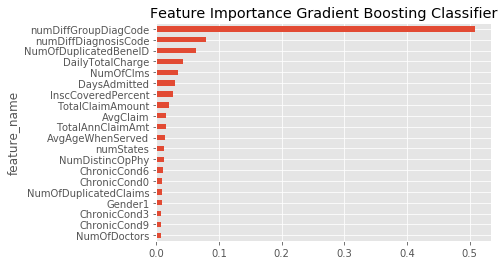

In [646]:
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists

pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.barh(x='feature_name',y='importance_score', legend=None)
plt.title('Feature Importance Gradient Boosting Classifier')

## Suport Vector Machine

In [647]:
from sklearn import svm
svm= svm.SVC()

In [648]:
scaled_features = scale(features)

np.random.seed(5)

X_trainS, X_testS, y_trainS, y_testS = train_test_split(scaled_features, target, test_size=0.2, random_state=42, stratify=target)




In [649]:
grid_para_svm = [
    {'C': [2500, 3000, 3500, 4000, 4500],
     'kernel': ['poly'],
     'degree': [3, 4, 5]},
    {'C': [2500, 3000, 3500, 4000, 4500],
     'gamma': [0.001, 0.0001],
     'kernel': ['rbf']}
]



In [650]:
np.random.seed(5)
svm_search = GridSearchCV(svm, grid_para_svm, scoring='accuracy', cv=5, iid=True, return_train_score=True,  n_jobs=-1)
svm_search.fit(X_trainS, y_trainS)

C:\Users\randy\anaconda\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid=True, n_jobs=-1,
             param_grid=[{'C': [2500, 3000, 3500, 4000, 4500],
                          'degree': [3, 4, 5], 'kernel': ['poly']},
                         {'C': [2500, 3000, 3500, 4000, 4500],
                          'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [651]:
svm_search.best_params_

{'C': 4000, 'degree': 3, 'kernel': 'poly'}

In [652]:
svm_search.best_score_

0.9446851899056844

In [654]:
svm_pred = svm_search.best_estimator_.predict(X_testS)
confusion_matrix(y_testS, svm_pred)
(898+965)/(898+83+16+965)

0.9495412844036697

## Support Vector Machine with imbalanced data

In [655]:
from sklearn import svm
svm_im = svm.SVC()

In [656]:

scaled_features_im = scale(features_im)

np.random.seed(5)

X_trainIM, X_testIM, y_trainIM, y_testIM = train_test_split(scaled_features_im, target_im, test_size=0.2, random_state=42, stratify=target_im)




In [660]:
grid_para_svm = [
    {'C': [2500, 3000, 3500, 4000],
     'kernel': ['poly'],
     'degree': [3, 4, 5]},
    {'C': [2500, 3000, 3500, 4000],
     'gamma': [0.001, 0.0001, 1e-5, 1e-6, 1e-7, 1e-8],
     'kernel': ['rbf']}
]


In [661]:
search_svm_im = GridSearchCV(svm_im, grid_para_svm, scoring='roc_auc', cv=5, iid=True, return_train_score=True,  n_jobs=-1)
search_svm_im.fit(X_trainIM, y_trainIM)

C:\Users\randy\anaconda\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid=True, n_jobs=-1,
             param_grid=[{'C': [2500, 3000, 3500, 4000], 'degree': [3, 4, 5],
                          'kernel': ['poly']},
                         {'C': [2500, 3000, 3500, 4000],
                          'gamma': [0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [662]:
search_svm_im.best_params_

{'C': 2500, 'gamma': 1e-06, 'kernel': 'rbf'}

In [663]:
search_svm_im.best_score_

0.9258310004745993

In [666]:
svm_im_pred = search_svm_im.best_estimator_.predict(X_testIM)
roc_auc_score(y_testIM, svm_im_pred)



0.7142539942067602

# Running a for loop to check the accuracy of each feature

In [518]:
forest_trial= ensemble.RandomForestClassifier(criterion='gini', max_depth=29, n_estimators=10)
le = LabelEncoder()

serviceType =le.fit_transform(train_data['ServiceType'])
train= train_data.copy()
train['ServiceType'] = serviceType

features = train.drop(['Provider', 'PotentialFraud', 'INDEX'], axis=1)
target= train['PotentialFraud']



,DaysAdmitted
0,2.440000
1,4.674242
2,2.429530
3,2.088412
4,1.958333
...,...
9803,3.966102
9804,4.319048
9805,4.246154
9806,6.919355


In [519]:
acc= {}

for i in range(len(features.columns)):
    forest_trial.fit(pd.DataFrame(features.iloc[:,i]), target)
    acc[features.columns[i]] = forest_trial.score(pd.DataFrame(features.iloc[:,i]), target)

acc
    
    

{'DaysAdmitted': 0.9634991843393148,
 'InscCoveredPercent': 0.9878670473083198,
 'TotalClaimAmount': 0.9869494290375204,
 'DailyTotalCharge': 0.990415986949429,
 'TotalAnnClaimAmt': 0.9896003262642741,
 'NumOfDoctors': 0.702283849918434,
 'NumOfPatients': 0.801284665579119,
 'ServiceType': 0.764783849918434,
 'NumOfClms': 0.807300163132137,
 'numStates': 0.7125815660685155,
 'numCounties': 0.7355220228384992,
 'AvgChronic': 0.7152324632952691,
 'AvgClaim': 0.8608278955954323,
 'numDiffDiagnosisCode': 0.8091353996737357,
 'numDiffGroupDiagCode': 0.8179037520391517,
 'AvgAgeWhenServed': 0.9745106035889071,
 'NumOfDuplicatedBeneID': 0.634584013050571,
 'NumOfDuplicatedAttendingPhysician': 0.6661908646003263,
 'NumOfDuplicatedClaims': 0.7218597063621534,
 'ChronicCond0': 0.6791394779771615,
 'ChronicCond1': 0.6960644371941273,
 'ChronicCond2': 0.7179853181076672,
 'ChronicCond3': 0.7351141924959217,
 'ChronicCond4': 0.7425570962479608,
 'ChronicCond5': 0.7475530179445351,
 'ChronicCond6': 

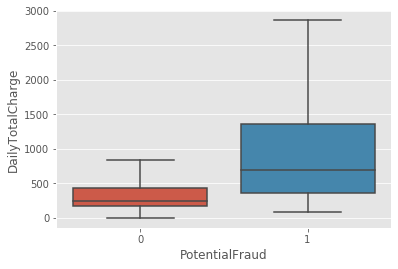

In [566]:
sns.boxplot(y='DailyTotalCharge', data=train_data3, x='PotentialFraud', showfliers=False)

In [458]:
trial_features = features.drop(['NumOfDuplicatedBeneID', 'NumOfDuplicatedAttendingPhysician', 'NumOfDuplicatedClaims'], axis=1)

target

0       0
1       1
2       0
3       1
4       0
       ..
9803    1
9804    1
9805    1
9806    1
9807    1
Name: PotentialFraud, Length: 9808, dtype: int64

In [459]:
np.random.seed(5)

X_trainT, X_testT, y_trainT, y_testT = train_test_split(trial_features, target, test_size=0.2, random_state=42, stratify=target)


In [461]:
np.random.seed(5)
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10)
}

forest_trial = GridSearchCV(randomForest2, grid_param, scoring='accuracy', cv=5, n_jobs=-1)
forest_trial = forest_trial.fit(X_trainT, y_trainT)

In [462]:
forest_trial.best_params_

{'criterion': 'gini', 'max_depth': 25, 'n_estimators': 20}

In [463]:
forest_trial.best_score_

0.9748920363897652

In [468]:
forest_trial.best_estimator_.fit(X_testT, y_testT)
forest_trial.best_estimator_.score(X_testT, y_testT)
X_testT

,DaysAdmitted,InscCoveredPercent,TotalClaimAmount,DailyTotalCharge,TotalAnnClaimAmt,NumOfDoctors,NumOfPatients,ServiceType,NumOfClms,numStates,numCounties,AvgChronic,AvgClaim,numDiffDiagnosisCode,numDiffGroupDiagCode,AvgAgeWhenServed,ChronicCond0,ChronicCond1,ChronicCond2,ChronicCond3,ChronicCond4,ChronicCond5,ChronicCond6,ChronicCond7,ChronicCond8,ChronicCond9,ChronicCond10,ChronicCond11,ChronicCond12,Gender1,Gender2,Race1,Race2,Race3,Race5,NumDistincOpPhy,NumDistincOtherPhy
9086,2.707447,0.958424,1626.099644,478.853019,9049.617021,31,257,0,564,2,20,5.500000,47.000000,106.0,69.0,73.359411,10.0,21.0,38.0,32.0,39.0,44.0,15.0,21.0,23.0,7.0,5.0,2.0,0.0,99,158,216,32,8,1,29.0,11.0
2426,1.000000,0.933333,823.333333,823.333333,1256.666667,2,3,2,3,1,1,3.333333,1.000000,0.0,0.0,74.333333,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,3,0,0,0,1.0,0.0
8886,5.330909,0.883625,6404.564103,1398.598359,14631.418182,71,253,0,275,13,40,4.500000,27.500000,110.0,140.0,73.269763,2.0,15.0,19.0,20.0,35.0,51.0,38.0,35.0,21.0,15.0,2.0,0.0,0.0,116,137,196,8,30,19,19.0,37.0
5701,2.135922,0.977347,738.194175,233.730570,6887.970874,30,91,0,206,1,19,4.500000,20.600000,28.0,6.0,71.971873,2.0,5.0,18.0,6.0,19.0,9.0,7.0,14.0,5.0,4.0,2.0,0.0,0.0,45,46,65,8,12,6,14.0,22.0
5360,3.645161,0.959609,2162.185185,463.996096,8948.156682,27,170,0,217,3,7,4.500000,21.700000,53.0,29.0,72.160000,9.0,11.0,21.0,28.0,19.0,24.0,22.0,17.0,10.0,7.0,2.0,0.0,0.0,68,102,128,24,7,11,15.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,3.784387,0.894387,4269.768657,1097.425535,11998.862454,60,226,0,269,10,53,5.000000,24.454545,97.0,103.0,72.500442,6.0,11.0,21.0,35.0,35.0,33.0,29.0,25.0,17.0,7.0,6.0,1.0,0.0,94,132,188,30,4,4,20.0,43.0
249,2.297872,0.952178,160.638298,98.824721,4921.659574,3,22,2,47,1,4,4.500000,4.700000,5.0,0.0,73.909091,3.0,1.0,3.0,5.0,1.0,2.0,1.0,1.0,4.0,0.0,1.0,0.0,0.0,10,12,19,3,0,0,4.0,2.0
7854,2.991786,0.967520,1498.129870,442.429273,9682.677907,26,919,0,2313,12,52,5.000000,210.272727,343.0,203.0,72.680162,61.0,88.0,105.0,121.0,126.0,127.0,108.0,74.0,57.0,35.0,14.0,3.0,0.0,389,530,742,98,26,53,27.0,11.0
6788,4.444444,0.947859,4490.555556,990.917328,10157.666667,14,18,0,18,4,8,4.625000,2.250000,7.0,5.0,77.222222,2.0,1.0,3.0,0.0,1.0,0.0,4.0,3.0,1.0,1.0,2.0,0.0,0.0,4,14,11,2,3,2,6.0,7.0


In [465]:
#Feature importance
sorted_importance = sorted(zip(trial_features.columns, forest_trial.best_estimator_.feature_importances_), key=lambda t:t[1], reverse=True)[:20]
sorted_importance.sort(key= lambda t : t[1])


Text(0.5, 1.0, 'Feature Importance Random Forest Classifier')

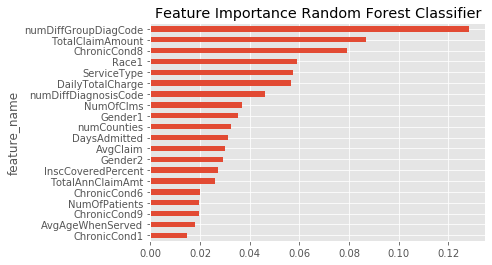

In [466]:
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists

pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.barh(x='feature_name',y='importance_score', legend=None)
plt.title('Feature Importance Random Forest Classifier')

In [ ]:
trial_pr = forest_trial.best_estimator.predict(X_testT)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_testT, trial_pr))
#print(roc_auc_score(y_testIM, y_predict_svm2))


# Trial Data Random Forest

In [532]:

forest_trial = ensemble.RandomForestClassifier()
features_trial = features.drop(['InscCoveredPercent', 'DailyTotalCharge', 'TotalAnnClaimAmt'], axis=1)



In [531]:
np.random.seed(5)

X_trainD, X_testD, y_trainD, y_testD = train_test_split(features_trial, target, test_size=0.2, random_state=42, stratify=target)


In [533]:
np.random.seed(5)
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10)
}

trial_search = GridSearchCV(forest_trial, grid_param, scoring='accuracy', cv=5, n_jobs=-1, return_train_score=True)
trial_search = trial_search.fit(X_trainD, y_trainD)

In [535]:
trial_search.best_params_

{'criterion': 'gini', 'max_depth': 30, 'n_estimators': 10}

In [536]:
trial_search.best_score_

0.9773130680826363

In [537]:
trial_search.best_estimator_.fit(X_testD, y_testD)
trial_search.best_estimator_.score(X_testD, y_testD)

0.9964322120285423

In [545]:
#Feature importance
sorted_importance = sorted(zip(features_trial.columns, trial_search.best_estimator_.feature_importances_), key=lambda t:t[1], reverse=True)[:20]
sorted_importance.sort(key= lambda t : t[1])


Text(0.5, 1.0, 'Feature Importance Random Forest Classifier')

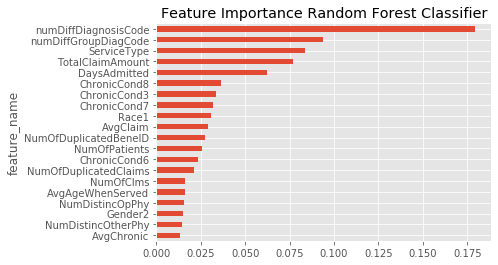

In [546]:
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists

pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.barh(x='feature_name',y='importance_score', legend=None)
plt.title('Feature Importance Random Forest Classifier')

## Trial Data Gradient Boosting Classifier, removing InsCoveredPercent, DailyTotalCharge, and TotalAnnClaimAmount

In [538]:
gbc2= ensemble.GradientBoostingClassifier()

np.random.seed(5)
grid_boost_para = [{
    "n_estimators": [100, 300, 500],
   "learning_rate":np.linspace(start=0, stop=1, num=10) }]

grid_boost2 = GridSearchCV(gbc2, grid_boost_para, scoring ='accuracy',cv=5, n_jobs=-1, return_train_score=True)
grid_boost2.fit(X_trainD, y_trainD)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [539]:
grid_boost2.best_params_

{'learning_rate': 1.0, 'n_estimators': 500}

In [540]:
grid_boost2.best_score_

0.9705591211896094

In [542]:
grid_boost2.best_estimator_.fit(X_testD, y_testD)
grid_boost2.best_estimator_.score(X_testD, y_testD)

1.0

In [ ]:
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists

pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.barh(x='feature_name',y='importance_score', legend=None)
plt.title('Feature Importance Random Forest Classifier')

In [ ]:
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists

pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.barh(x='feature_name',y='importance_score', legend=None)
plt.title('Feature Importance Random Forest Classifier')

## Gradient Boosting with most important features

In [549]:
best_features = features[['numDiffDiagnosisCode','numDiffGroupDiagCode', 'TotalClaimAmount', 'DailyTotalCharge', 
                          'DaysAdmitted', 'ServiceType']]

In [582]:
np.random.seed(5)

X_trainB, X_testB, y_trainB, y_testB = train_test_split(best_features, target, test_size=0.2, random_state=42, stratify=target)



In [584]:
gbc_best= ensemble.GradientBoostingClassifier()

np.random.seed(5)
grid_boost_para = [{
    "n_estimators": [100, 300, 500],
   "learning_rate":np.linspace(start=1e-2 , stop=1, num=10) }]

grid_best = GridSearchCV(gbc_best, grid_boost_para, scoring ='accuracy',cv=5, n_jobs=-1, return_train_score=True)
grid_best.fit(X_trainB, y_trainB)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...e,
               

In [585]:
grid_best.best_params_

{'learning_rate': 0.67, 'n_estimators': 500}

In [586]:
grid_best.best_score_

0.9664800899595264

In [587]:
pred= grid_best.best_estimator_.predict(X_testB)

In [588]:
confusion_matrix(y_testB, pred)

array([[941,  40],
       [  0, 981]], dtype=int64)

In [574]:
result.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_learning_rate', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [589]:
b= result.mean_train_score

In [590]:
a= result.mean_test_score

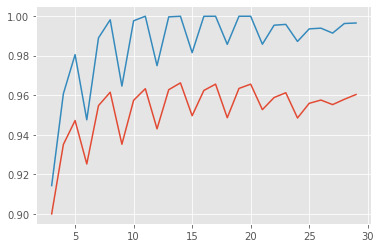

In [591]:
a.plot(kind='line')
b.plot(kind='line')

## Visualizing the most important features

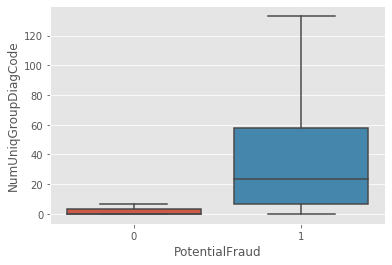

In [697]:
sns.boxplot(y='NumUniqGroupDiagCode', data=train_data3, x= 'PotentialFraud', showfliers=False)

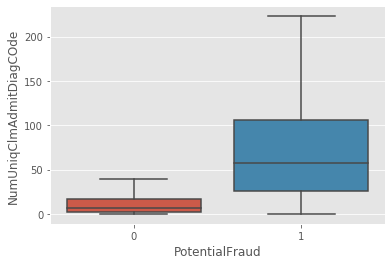

In [700]:
sns.boxplot(y='NumUniqClmAdmitDiagCOde', data=train_data3, x= 'PotentialFraud', showfliers=False)

In [704]:
full_data.ClmAdmitDiagnosisCode.value_counts()

V7612    4074
42731    3634
78605    2992
4019     2732
25000    2368
         ... 
35571       1
7848        1
47811       1
9238        1
37762       1
Name: ClmAdmitDiagnosisCode, Length: 4098, dtype: int64